In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

# Covid 19     DSC672    SHU-YA CHIANG

In [30]:
import nltk
import pickle
nltk.download('punkt')
nltk.download('stopwords')
import os
import re
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to C:\Users\Shuya
[nltk_data]     C\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shuya
[nltk_data]     C\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [31]:
import torch
import numpy
from numpy.testing import assert_almost_equal
import numpy as np
import pickle
from sklearn.externals import joblib
from nltk.stem import PorterStemmer 
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
#%cd /content/drive/My Drive/kaggle

In [24]:
infile=open("pmcBoW.pkl",'rb') #This file use stemming
df=pickle.load(infile)

In [25]:
df=df.drop(columns=['bow','BoW'])

In [26]:
#custom_stop_words = [ 'doi',  'et', 'al','al.']

In [ ]:
df['BoW'] = " "
for index,row in df.iterrows():
    description = row['body_text']
    # split into words
    tokens = word_tokenize(description,language="english")
#   convert to lower case
    tokens = [w.lower() for w in tokens]
# remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
# filter out stop words
    custom_stop_words = [ 'doi',  'et', 'al','al.']
    stop_words=(stopwords.words('english'))
    stop_words = stop_words.extend(custom_stop_words)
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
# stemming of words - reducing each word to its root or base.
    porter = PorterStemmer()
    word = [porter.stem(word) for word in words]
    df.at[index,'BoW'] = word
df['BoW'] = [' '.join(map(str, l)) for l in df['BoW']]

In [ ]:
df.to_pickle("pmc_BoW.pkl")# this file remove et al

In [200]:
# stage 3 rewrite NLTK text cleaning to a function called tokenization
from nltk.stem import *
def tokenization(query):
  tokens = word_tokenize(query,language="english")
# convert to lower case
  tokens = [w.lower() for w in tokens]
# remove punctuation from each word
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]
# filter out stop words
  custom_stop_words = [ 'doi',  'et', 'al','al.']
  stop_words=(stopwords.words('english'))
  stop_words = stop_words.extend(custom_stop_words)
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
# stemming of words - reducing each word to its root or base.
  porter = PorterStemmer()
  word = [porter.stem(word) for word in words]
  return word

In [ ]:
df

In [ ]:
#file=open("pmcBoW.pkl",'rb') #This file remove et al
#df=pickle.load(file)

In [ ]:
#newdf=df.drop(columns=['bow'])
#newdf

In [ ]:
newdf.to_pickle('pmc_newBow.pkl')

In [ ]:
file1=open("pmc_newBow.pkl",'rb') #This file remove et al
df_new=pickle.load(file1)

In [ ]:
df_new.head()

In [ ]:
df3 = pd.read_csv('clean_data.csv')
duplicate=df.duplicated(subset=['title', 'abstract'])
data = df[~duplicate].reset_index(drop=True)
data.to_pickle("clean_data.pkl")

# PCA and KNN

In [ ]:
#bow_vect = CountVectorizer(analyzer='word',stop_words='english', max_features=4000)
#bow_matrix = bow_vect.fit_transform(df['BoW'])

In [ ]:
vectorizer = TfidfVectorizer(max_features=4000)
tfidf_bow = vectorizer.fit_transform(df_new['BoW'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
tfid_matrix_reduced= pca.fit_transform(tfidf_bow.toarray())
tfid_matrix_reduced.shape

In [ ]:
#choose k for kmean with Elbow method 
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 31))
for k in list_k:
    Kmean = KMeans(n_clusters=k)
    Kmean.fit(tfid_matrix_reduced)
    sse.append(Kmean.inertia_)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
#choose k for kmean with Elbow method 
from sklearn.cluster import KMeans
sse3 = []
list_k2 = list(range(2, 51))
for k in list_k2:
    Kmean = KMeans(n_clusters=k)
    Kmean.fit(tfid_matrix_reduced)
    sse3.append(Kmean.inertia_)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k2, sse3, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
x = [list_k2[0], list_k2[-1]]
y = [sse3[0], sse3[-1]]

# Plot the elbow
plt.plot(list_k2, sse3, 'b-')
plt.plot(x, y, 'r')
plt.xlabel('Number of clusters')
plt.ylabel(' Sum of square error')
plt.title('The Elbow Method showing k')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [ ]:
k = 20 # K can choose 20 or 21
kmeans = KMeans(n_clusters=k, random_state=14)
y_pred = kmeans.fit_predict(tfid_matrix_reduced)
df_new['y'] = y_pred

In [ ]:
df_new.head()

In [ ]:
df_new.to_pickle("df_k20.pkl")

In [ ]:
file2=open("pmc_newBow.pkl",'rb') #This file remove et al
df_new21=pickle.load(file2)

In [ ]:
k = 21 # Using K=21
kmeans = KMeans(n_clusters=k, random_state=14)
y_pred2 = kmeans.fit_predict(tfid_matrix_reduced)
df_new21['y'] = y_pred2

In [ ]:
df_new21.to_pickle("df_k21.pkl")

In [ ]:
print(tfidf_bow.shape) # x
joblib.dump(tfidf_bow, 'tfidf_vectorized.csv')

In [ ]:
#LDA only needs a bag-of-word vector
bow_vect = CountVectorizer(analyzer='word',stop_words='english', max_features=4000)
bow_matrix = bow_vect.fit_transform(df_new['BoW'])
joblib.dump(bow_matrix, 'count_vectorized.csv')

In [32]:
infile=open("df_k20.pkl",'rb') #This file use stemming
df=pickle.load(infile)

In [33]:
vectorizer20= []
for i in range(1, 21):
    # Creating a vectorizer
    vectorizer20.append(CountVectorizer(analyzer='word',stop_words='english', max_features=4000))

In [35]:
Y = df.groupby("y")

In [36]:
K1 = Y.get_group(0)
K2 = Y.get_group(1)
K3 = Y.get_group(2)
K4 = Y.get_group(3)
K5 = Y.get_group(4)
K6 = Y.get_group(5)
K7 = Y.get_group(6)
K8 = Y.get_group(7)
K9 = Y.get_group(8)
K10 = Y.get_group(9)
K11 = Y.get_group(10)
K12 = Y.get_group(11)
K13 = Y.get_group(12)
K14 = Y.get_group(13)
K15 = Y.get_group(14)
K16 = Y.get_group(15)
K17 = Y.get_group(16)
K18 = Y.get_group(17)
K19 = Y.get_group(18)
K20 = Y.get_group(19)

In [38]:
vectorize = []
for k, vec in enumerate(vectorizer20):
    vectorize.append(vec.fit_transform(df_new.loc[df['y'] == k, 'BoW']))

In [39]:
for i in range(0,20):
    print(vectorize[i].shape)
print(len(vectorize))

(174, 4000)
(902, 4000)
(207, 4000)
(724, 4000)
(856, 4000)
(174, 4000)
(354, 4000)
(386, 4000)
(70, 84)
(673, 4000)
(717, 4000)
(686, 4000)
(398, 4000)
(163, 4000)
(1038, 4000)
(257, 4000)
(372, 4000)
(428, 4000)
(532, 4000)
(78, 4000)
20


In [165]:
vect = []
for i in range(1, 22):
    # Creating a vectorizer
    vect.append(CountVectorizer(analyzer='word',stop_words='english', max_features=4000))

In [166]:
vectorized21 = []
for K, count_vect in enumerate(vect):
    vectorized21.append(count_vect.fit_transform(df_new21.loc[df_new21['y'] == K, 'BoW']))

In [167]:
for i in range(0,21):
    print(vectorized21[i].shape)
print(len(vectorized21))

(513, 4000)
(80, 4000)
(395, 4000)
(338, 4000)
(1249, 4000)
(385, 4000)
(637, 4000)
(162, 4000)
(175, 4000)
(516, 4000)
(165, 4000)
(633, 4000)
(841, 4000)
(409, 4000)
(434, 4000)
(465, 4000)
(78, 4000)
(70, 84)
(1038, 4000)
(111, 4000)
(495, 4000)
21


In [64]:
corpus = df.BoW.str.split()

In [65]:
!pip install gensim
from gensim import corpora, models
dictionary = Dictionary(corpus)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0 aa
1 aadelet
2 abcam
3 abclon
4 absenc
5 accord
6 accur
7 acidinduc
8 act
9 activ
10 acut


In [66]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

In [70]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import HdpModel

In [74]:
hdp = HdpModel(bow_corpus, dictionary)

In [75]:
topic_info = hdp.print_topics(num_topics=20, num_words=10)

In [76]:
topic_info

[(0,
  '0.005*vaccin + 0.005*influenza + 0.003*p + 0.003*genom + 0.003*fig + 0.003*outbreak + 0.003*risk + 0.003*transmiss + 0.003*age + 0.003*hospit'),
 (1,
  '0.007*fig + 0.005*bind + 0.005*mice + 0.005*antibodi + 0.005*replic + 0.004*inhibit + 0.004*h + 0.004*induc + 0.004*signal + 0.003*membran'),
 (2,
  '0.016*hz + 0.013*usepackag + 0.011*j + 0.007*h + 0.006*fig + 0.005*pedv + 0.005*antibodi + 0.004*n + 0.004*δ + 0.004*document'),
 (3,
  '0.090*usepackag + 0.026*document + 0.015*end + 0.015*begin + 0.013*minim + 0.013*oddsidemargin + 0.013*amssymb + 0.013*amsmath + 0.013*wasysym + 0.013*mathrsf'),
 (4,
  '0.006*vaccin + 0.005*influenza + 0.005*z + 0.005*p + 0.004*fcv + 0.004*cap + 0.004*calv + 0.003*pneumonia + 0.003*fig + 0.003*lcmv'),
 (5,
  '0.010*amplif + 0.005*nonspecif + 0.005*antibodi + 0.004*min + 0.004*reaction + 0.004*vaccin + 0.004*l + 0.004*usa + 0.004*concentr + 0.003*dna'),
 (6,
  '0.008*vaccin + 0.006*season + 0.005*risk + 0.004*antibodi + 0.004*estim + 0.003*childr

In [87]:
#LDA only needs a bag-of-word vector
bow_vect = CountVectorizer(analyzer='word',stop_words='english', max_features=4000)
bow_matrix = bow_vect.fit_transform(df['BoW'])
joblib.dump(bow_matrix, 'count_vectorized.csv')

['count_vectorized.csv']

In [90]:
# Latent Dirichlet Allocation Model
from sklearn.decomposition import LatentDirichletAllocation
lda_models20 = []   
for i in range(0, 20):
    lda = LatentDirichletAllocation(n_components=20,  random_state=14)
    lda_models20.append(lda)

In [93]:
#cluster_lda = []
#for k,da in enumerate(lda_models20):
#    cluster_lda.append(lda.fit_transform(vectorize[k]))

In [95]:
k1_20=vectorize[0]
LDA = LatentDirichletAllocation(n_components=1,  random_state=14)
k1_m=LDA.fit_transform(k1_20)
t_features = bow_vect.get_feature_names()
key_word=[]
for t_id, topic in enumerate(LDA.components_):
    w=[t_features[i] for i in topic.argsort()[:-10 - 1:-1]]
    key_word.extend(w)
    #print (" ".join([t_features[i] for i in topic.argsort()[:-20 - 1:-1]]))
    print ("Topic %d :" % (t_id) ,str(w))

Topic 0 : ['autom', 'centr', 'unless', 'sequenti', 'southeast', 'vh', 'immunodefici', 'histori', 'viabil', 'stool']


In [96]:
k1_20=vectorize[0]
LDA = LatentDirichletAllocation(n_components=20,  random_state=14)
k1_m=LDA.fit_transform(k1_20)
t_features = bow_vect.get_feature_names()
key_word=[]
for t_id, topic in enumerate(LDA.components_):
    w=[t_features[i] for i in topic.argsort()[:-10 - 1:-1]]
    key_word.extend(w)
    #print (" ".join([t_features[i] for i in topic.argsort()[:-20 - 1:-1]]))
    print ("Topic %d :" % (t_id) ,str(w))

Topic 0 : ['sequenti', 'autom', 'cortex', 'salin', 'unless', 'southeast', 'fox', 'hpv', 'ribavirin', 'stool']
Topic 1 : ['autom', 'agil', 'encount', 'heterogen', 'immunodefici', 'southeast', 'stool', 'popular', 'domain', 'design']
Topic 2 : ['satur', 'fox', 'count', 'cocktail', 'detector', 'belgium', 'formal', 'calv', 'novemb', 'unknown']
Topic 3 : ['autom', 'exosom', 'sacrif', 'interv', 'prescript', 'salin', 'secondari', 'reli', 'low', 'immunodefici']
Topic 4 : ['autom', 'vh', 'analyt', 'unless', 'immunodefici', 'stool', 'salin', 'denmark', 'southeast', 'suspect']
Topic 5 : ['autom', 'sequenti', 'viabil', 'southeast', 'salin', 'vertebr', 'unless', 'vh', 'stool', 'rang']
Topic 6 : ['autom', 'histori', 'vh', 'heterogen', 'viabil', 'immunodefici', 'southeast', 'diamet', 'cortex', 'amelior']
Topic 7 : ['formula', 'senesc', 'diseas', 'sequenti', 'autom', 'exact', 'southeast', 'proport', 'epitop', 'unless']
Topic 8 : ['centr', 'autom', 'immunodefici', 'late', 'vh', 'unless', 'histori', 'via

In [97]:
def unique(list): 
    unique_list = [] 
    for x in list: 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

In [98]:
topic_y0=unique(key_word)

In [99]:
def topic_lda(vectorize,i): 
     LDA = LatentDirichletAllocation(n_components=20,  random_state=14)
     model=LDA.fit_transform(vectorize[i])
     t_features = bow_vect.get_feature_names()
     key_wordlist=[]
     for t_id, topic in enumerate(LDA.components_):
        w=[t_features[i] for i in topic.argsort()[:-10 - 1:-1]]
        key_wordlist.extend(w)
        result= ("Topic %d :" % (t_id) ,str(w))
        topic_y=unique(key_wordlist)
     return topic_y

In [100]:
def topic1_lda_cluster(vectorize,i): 
     LDA = LatentDirichletAllocation(n_components=1,  random_state=14)
     model=LDA.fit_transform(vectorize[i])
     t_features = bow_vect.get_feature_names()
     key_wordlist=[]
     for t_id, topic in enumerate(LDA.components_):
        w=[t_features[i] for i in topic.argsort()[:-10 - 1:-1]]
        key_wordlist.extend(w)
        result= ("Topic %d :" % (t_id) ,str(w))
        topic_y=unique(key_wordlist)
     return topic_y

# Topic model for each cluster

In [101]:
y0=topic_lda(vectorize,0)
y0_top1=topic1_lda_cluster(vectorize,0)

In [102]:
y1=topic_lda(vectorize,1)
y1_top1=topic1_lda_cluster(vectorize,1)

In [103]:
y2= topic_lda(vectorize,2)
y2_top1=topic1_lda_cluster(vectorize,2)

In [106]:
y3= topic_lda(vectorize,3)
y3_top1=topic1_lda_cluster(vectorize,3)

In [107]:
y4= topic_lda(vectorize,4)
y4_top1=topic1_lda_cluster(vectorize,4)

In [108]:
y5= topic_lda(vectorize,5)
y5_top1=topic1_lda_cluster(vectorize,5)

In [109]:
y6= topic_lda(vectorize,6)
y6_top1=topic1_lda_cluster(vectorize,6)

In [110]:
y7= topic_lda(vectorize,7)
y7_top1=topic1_lda_cluster(vectorize,7)

In [111]:
y8= topic_lda(vectorize,8)
y8_top1=topic1_lda_cluster(vectorize,8)

In [112]:
y9= topic_lda(vectorize,9)
y9_top1=topic1_lda_cluster(vectorize,9)

In [113]:
y10= topic_lda(vectorize,10)
y10_top1=topic1_lda_cluster(vectorize,10)

In [114]:
y11= topic_lda(vectorize,11)
y11_top1=topic1_lda_cluster(vectorize,11)

In [115]:
y12= topic_lda(vectorize,12)
y12_top1=topic1_lda_cluster(vectorize,12)

In [116]:
y13= topic_lda(vectorize,13)
y13_top1=topic1_lda_cluster(vectorize,13)

In [128]:
y14= topic_lda(vectorize,14)
y14_top1=topic1_lda_cluster(vectorize,14)

In [119]:
y15= topic_lda(vectorize,15)
y15_top1=topic1_lda_cluster(vectorize,15)

In [120]:
y16= topic_lda(vectorize,16)
y16_top1=topic1_lda_cluster(vectorize,16)

In [121]:
y17= topic_lda(vectorize,17)
y17_top1=topic1_lda_cluster(vectorize,17)

In [122]:
y18= topic_lda(vectorize,18)
y18_top1=topic1_lda_cluster(vectorize,18)

In [123]:
y19= topic_lda(vectorize,19)
y19_top1=topic1_lda_cluster(vectorize,19)

In [129]:
print(y19_top1)
print(y18_top1)
print(y17_top1)
print(y16_top1)
print(y15_top1)
print(y14_top1)
print(y13_top1)
print(y12_top1)
print(y11_top1)
print(y10_top1)
print(y9_top1)
print(y8_top1)
print(y7_top1)
print(y6_top1)
print(y5_top1)
print(y4_top1)
print(y3_top1)
print(y2_top1)
print(y1_top1)
print(y0_top1)

['tropic', 'detach', 'dromedari', 'australian', 'master', 'allerg', 'vacv', 'allevi', 'allergen', 'allergi']
['percentag', 'strongli', 'vaccinia', 'inflammatori', 'grid', 'shape', 'hour', 'rev', 'cognit', 'dmv']
['chain', 'mode', 'inhal', 'util', 'exponenti', 'round', 'virusinduc', 'fewer', 'actual', 'viroporin']
['erythrocyt', 'airborn', 'cellswel', 'prospect', 'unlik', 'influenc', 'vero', 'vector', 'stratifi', 'acquir']
['unlik', 'delay', 'rneasi', 'applic', 'outer', 'synergist', 'pool', 'vessel', 'disappear', 'puls']
['usepackag', 'certainli', 'inoculum', 'acut', 'strictli', 'viruslik', 'effus', 'pseudomona', 'fip', 'reticulum']
['particularli', 'cellular', 'unpublish', 'station', 'immunohistochemistri', 'vimentin', 'pi', 'prompt', 'rrna', 'stop']
['melanoma', 'burden', 'ib', 'twenti', 'criteria', 'near', 'th', 'ta', 'energi', 'diego']
['prone', 'utr', 'cattl', 'billion', 'strain', 'pc', 'fall', 'activ', 'inhibitori', 'select']
['scientist', 'usepackag', 'gastroenter', 'gel', 'virtu

In [130]:
import pickle
pickle.dump(bow_corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [140]:
number_topics=20
LDA = LatentDirichletAllocation(n_components = number_topics, max_iter = 10, 
                                learning_offset = 50.,random_state = 14,
                                learning_method = 'online')
lda_out=LDA.fit(bow_matrix)
t_features = bow_vect.get_feature_names()
for t_id, topic in enumerate(LDA.components_):
    print ("Topic %d:" % (t_id))
    print (" ".join([t_features[i] for i in topic.argsort()[:-number_topics - 1:-1]]))

Topic 0:
usepackag document end begin minim setlength amssymb amsmath oddsidemargin upgreek wasysym mathrsf amsbsi amsfont documentclass right left frac mathrm rm
Topic 1:
human bat infect viru merscov anim speci host diseas sarscov virus transmiss studi viral cov dog pathogen camel includ caus
Topic 2:
case diseas infect outbreak transmiss popul risk health epidem contact report time individu number studi use infecti data control effect
Topic 3:
mice cell infect day group use fig anim lung tissu figur level control observ compar express follow significantli increas mous
Topic 4:
cell al et infect respons express immun activ gene viral ifn type cytokin signal induc mice receptor role diseas function
Topic 5:
cell infect express use protein fig figur viru activ viral incub cultur result transfect antibodi level inhibit control assay replic
Topic 6:
sequenc gene genom use strain virus region read analysi nucleotid mutat viral identifi viru genet sampl genotyp isol tabl rna
Topic 7:
respi

In [143]:
lda_output = LDA.fit_transform(bow_matrix)

In [132]:
import gensim
num_topic = 20
ldamodel = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics = num_topic, id2word=dictionary, passes=15)
ldamodel.save('model.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(0, '0.019*"replic" + 0.018*"ifn" + 0.017*"mrna" + 0.014*"antivir" + 0.014*"transcript" + 0.013*"inhibit" + 0.009*"translat" + 0.009*"mutant" + 0.009*"signal" + 0.008*"sirna"')
(1, '0.021*"pathway" + 0.014*"signal" + 0.014*"regul" + 0.011*"induc" + 0.010*"apoptosi" + 0.010*"inhibit" + 0.009*"hcv" + 0.009*"cancer" + 0.009*"cellular" + 0.008*"transcript"')
(2, '0.010*"public" + 0.009*"outbreak" + 0.009*"countri" + 0.008*"risk" + 0.008*"particip" + 0.007*"pandem" + 0.007*"hospit" + 0.006*"surveil" + 0.006*"influenza" + 0.006*"care"')
(3, '0.020*"usepackag" + 0.019*"estim" + 0.013*"transmiss" + 0.013*"epidem" + 0.011*"network" + 0.011*"contact" + 0.010*"paramet" + 0.010*"distribut" + 0.008*"r" + 0.008*"probabl"')
(4, '0.032*"merscov" + 0.030*"cat" + 0.027*"sarscov" + 0.018*"dog" + 0.015*"sar" + 0.011*"camel" + 0.009*"mer" + 0.008*"coronaviru" + 0.008*"transmiss" + 0.007*"hev"')
(5, '0.023*"replic" + 0.021*"genom" + 0.018*"membran" + 0.015*"recombin" + 0.012*"virion" + 0.010*"particl" + 0.0

# LDA 20 topic for sampled dataset

In [134]:
!pip install pyLDAvis
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

  Stored in directory: C:\Users\Shuya C\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Stored in directory: C:\Users\Shuya C\AppData\Local\pip\Cache\wheels\8b\99\a0\81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Stored in directory: C:\Users\Shuya C\AppData\Local\pip\Cache\wheels\20\5a\d8\1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis future funcy


You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [139]:
print("Log Likelihood: ", LDA.score(bow_matrix))
print("Perplexity: ", LDA.perplexity(bow_matrix))
print(LDA.get_params())

Log Likelihood:  -166705456.32222593
Perplexity:  10593.878514977094
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': 14, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [144]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=20, random_state=14).fit_predict(lda_output)

In [147]:
df['lda_k'] = clusters

In [148]:
df

,paper_id,title,body_text,BoW,y,lda_k
0,PMC6818788,P200 family protein IFI204 negatively regulate...,The interferon (IFN)-mediated innate immune re...,interferon ifn mediat innat immun respons impo...,3,8
1,PMC6863772,Microglia Are Essential to Protective Antivira...,Viral encephalitis is defined as pathological ...,viral enceph defin patholog inflamm brain pare...,17,4
2,PMC6812964,The Tudor SND1 protein is an m6A RNA reader es...,N6-methyladenosine (m6A) is the most prevalent...,preval intern modif eukaryot messeng rna mrna ...,11,8
3,PMC6829355,Glycosylation of Zika Virus is Important in Ho...,Zika virus (ZIKV) is mainly transmitted to hum...,zika viru zikv mainli transmit human via infec...,4,8
4,PMC6874086,NEDD4 family ubiquitin ligases associate with ...,The mammalian endosomal sorting complex requir...,mammalian endosom sort complex requir transpor...,11,8
5,PMC6827983,Role of rhesus macaque IFITM3(2) in simian imm...,The interferon (IFN) system is an integral com...,interferon ifn system integr compon innat immu...,4,8
6,PMC6852903,Risk factors of 90-day rehospitalization follo...,Readmission of patients initially hospitalized...,readmiss patient initi hospit commun acquir pn...,7,3
7,PMC6789792,Moving from Empirical to Rational Vaccine Desi...,Vaccines are one of the greatest breakthroughs...,vaccin one greatest breakthrough field medicin...,6,18
8,PMC6780409,Antiviral Activity of Exopolysaccharides Produ...,"Despite successes of vaccination, chemoprevent...",despit success vaccin chemoprevent chemotherap...,4,8
9,PMC6890879,Evaluation of antiviral activity of Bacillus l...,"Beginning in 2013, outbreaks of new variants o...",begin outbreak new variant porcin epidem diarr...,13,12


# Classification: 
# Purpose-1. to compare K=20 vs K=21   
# 2. as an evaluation of KNN results  
# 3.See BM25'S BEST MATCHES belong to which cluster

In [177]:
from sklearn.model_selection import train_test_split
# test set size 23% of the data and the random seed 14
x_train, x_test, y_train, y_test = train_test_split(tfidf_bow.toarray(),df['y'], test_size=0.3, random_state=14)
print("x_train size:", len(x_train))
print("x_test size:", len(x_test))

x_train size: 6432
x_test size: 2757


In [150]:
from sklearn.model_selection import train_test_split
# test set size 23% of the data and the random seed 14
x_train2, x_test2, y_train2, y_test2 = train_test_split(tfidf_bow.toarray(),df['lda_k'], test_size=0.3, random_state=14)
print("x_train size:", len(x_train2))
print("x_test size:", len(x_test2))

x_train size: 6432
x_test size: 2757


In [151]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def classification_report(y_test, y_pred):
    print(" Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(y_test, y_pred))))
    print(" Precision: ", '{:,.3f}'.format(float(precision_score(y_test, y_pred, average='macro'))))
    print(" Recall: ", '{:,.3f}'.format(float(recall_score(y_test, y_pred, average='macro'))))
    print(" F1 score: ", '{:,.3f}'.format(float(f1_score(y_test, y_pred, average='macro'))))

In [152]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict

In [297]:
#Naive Bayes using K=20 dataset
gnb = GaussianNB()
gnb_mdl=gnb.fit(x_train, y_train)
Y_pred = gnb_mdl.predict(x_test)

In [303]:
y_pred_trainset = cross_val_predict(gnb, x_train, y_train, cv=3)

In [304]:
print("Naive Bayes model - train set result:")
classification_report(y_train, y_pred_trainset)

Naive Bayes model - train set result:
 Accuracy Score:  0.431


C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Precision:  0.456
 Recall:  0.344
 F1 score:  0.354


In [300]:
print("Naive Bayes model -test set result:")
classification_report(y_test, Y_pred)

Naive Bayes model -test set result:
 Accuracy Score:  0.477
 Precision:  0.563
 Recall:  0.421
 F1 score:  0.429


# RandomForest k-mean cluster

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rclf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=14)  
r_mdl=rclf.fit(x_train, y_train)
y_pred_traindata = cross_val_predict(rclf, x_train, y_train, cv=5)
y_pred_test = r_mdl.predict(x_test)

In [179]:
print("RandomForest model - train set result:")
classification_report(y_train, y_pred_traindata)
print("RandomForest model  -test set result:")
classification_report(y_test, y_pred_test)

RandomForest model - train set result:
 Accuracy Score:  0.689
 Precision:  0.805
 Recall:  0.587
 F1 score:  0.599
RandomForest model  -test set result:
 Accuracy Score:  0.689
 Precision:  0.816
 Recall:  0.598
 F1 score:  0.611


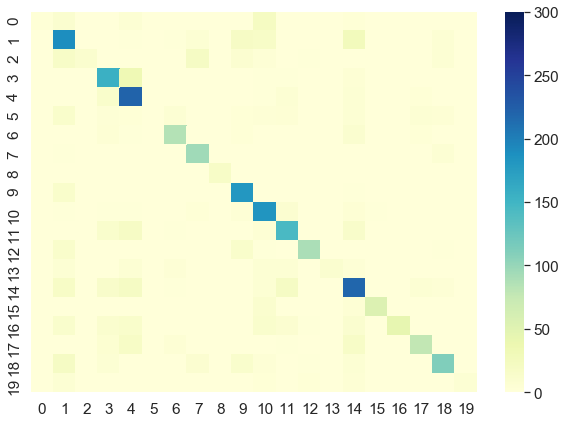

In [194]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
sn.heatmap(cn_matrix, annot=False,  cmap="YlGnBu", vmin=0, vmax=300)
plt.show()

# RandomForest LDA cluster output

In [154]:
rclf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=14)  
r_mdl2=rclf.fit(x_train2, y_train2)
y_pred_traindata2 = cross_val_predict(rclf, x_train2, y_train2, cv=5)
y_pred_test2 = r_mdl2.predict(x_test2)

In [155]:
print("RandomForest model - train set result LDA:")
classification_report(y_train2, y_pred_traindata2)
print("RandomForest model  -test set result LDA:")
classification_report(y_test2, y_pred_test2)

RandomForest model - train set result LDA:
 Accuracy Score:  0.675
 Precision:  0.709
 Recall:  0.630
 F1 score:  0.642
RandomForest model  -test set result LDA:
 Accuracy Score:  0.680
 Precision:  0.704
 Recall:  0.640
 F1 score:  0.648


In [171]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test2, y_pred_test2)

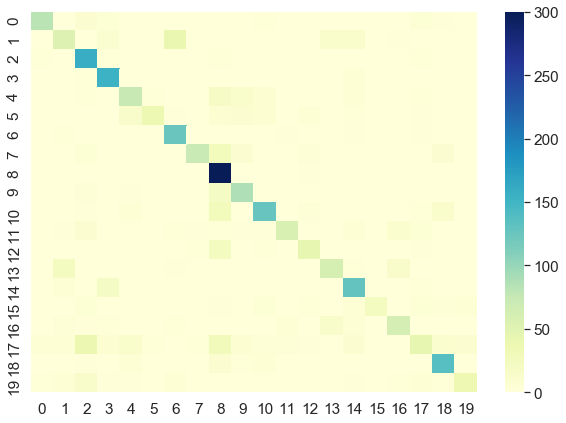

In [195]:
#df_cm = pd.DataFrame(cnf_matrix, range(20), range(20))
sn.set(font_scale=1.4) 
plt.figure(figsize = (10,7))
sn.heatmap(cnf_matrix, annot=False,  cmap="YlGnBu", vmin=0, vmax=300)
plt.show()

In [309]:
from sklearn.ensemble import GradientBoostingClassifier
gbtclf=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=3, max_depth=3, random_state=14)
gb_ml=gbtclf.fit(x_train, y_train)
y_pred_tndata = cross_val_predict(gbtclf, x_train, y_train, cv=5)
y_pred_test_gb = gb_ml.predict(x_test)

In [310]:
print("GradientBoosting model - train set result:")
classification_report(y_train, y_pred_tndata)
print("GradientBoosting model  -test set result:")
classification_report(y_test, y_pred_test_gb)

GradientBoosting model - train set result:
 Accuracy Score:  0.847
 Precision:  0.884
 Recall:  0.866
 F1 score:  0.873
GradientBoosting model  -test set result:
 Accuracy Score:  0.857
 Precision:  0.891
 Recall:  0.867
 F1 score:  0.878


In [311]:
# using K=21 dataset
x_train2, x_test2, y_train2, y_test2 = train_test_split(tfidf_bow.toarray(),df_new21['y'], test_size=0.3, random_state=14)

In [312]:
rclf2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=14)  
r_mdl2=rclf.fit(x_train2, y_train2)
y_pred_traindata2 = cross_val_predict(rclf2, x_train2, y_train2, cv=5)
y_pred_tt = r_mdl.predict(x_test2)

In [314]:
print("RandomForest model(K=21) - train set result:")
classification_report(y_train2, y_pred_traindata2)
print("RandomForest model (K=21) -test set result:")
classification_report(y_test2, y_pred_tt)

RandomForest model(K=21) - train set result:
 Accuracy Score:  0.673


C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Precision:  0.716
 Recall:  0.537
 F1 score:  0.552
RandomForest model (K=21) -test set result:
 Accuracy Score:  0.680
 Precision:  0.762
 Recall:  0.554
 F1 score:  0.572


Text(0, 0.5, 'Count')

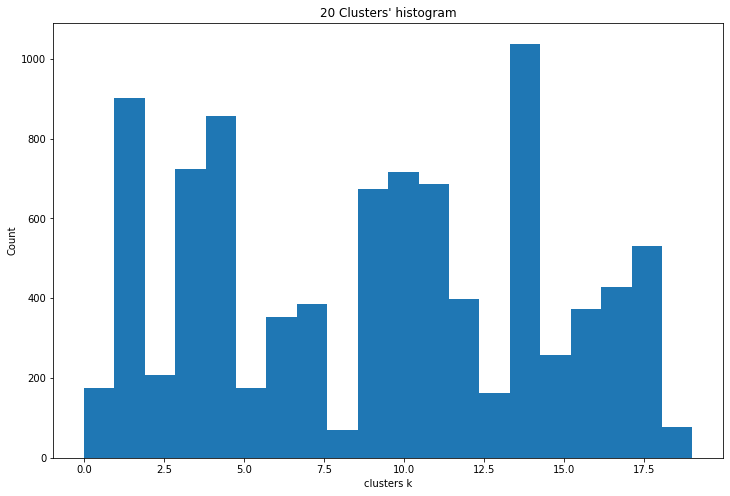

In [505]:
df_new.hist(column='y', bins=20, grid = False, figsize=(12,8))
plt.title("20 Clusters' histogram")
plt.xlabel('clusters k')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

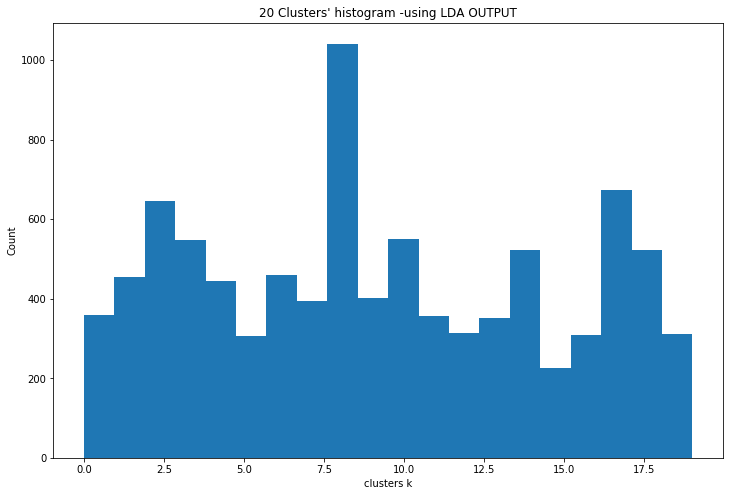

In [149]:
df.hist(column='lda_k', bins=20, grid = False, figsize=(12,8))
plt.title("20 Clusters' histogram -using LDA OUTPUT")
plt.xlabel('clusters k')
plt.ylabel('Count')

In [145]:
#corpus = df_new.BoW.str.split()

# BM 25 model to find most relevant document

In [187]:
!pip install rank_bm25

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [188]:
#query='What is known about transmission, incubation, and environmental stability?'
#tokenization(query)

In [190]:
from rank_bm25 import BM25Okapi
from sklearn.externals import joblib
model = BM25Okapi(corpus)
joblib.dump(model,'modelbm15.joblib')

['modelbm15.joblib']

In [196]:
#stage 3 - implement bm25 - search engine
from rank_bm25 import BM25Okapi
def search(query, n=5):
    'Search query return top n similar documents index '
    token_q = tokenization(query)
    #bm25 = BM25Okapi(corpus)
    doc_scores = model.get_scores(token_q)
    print(doc_scores[::-1][:n])
    top_n_doc = np.argsort(doc_scores)[::-1][:n]
    return top_n_doc

In [197]:
#bm25.get_top_n(q,df.body_text,1)

In [198]:
query='What is known about transmission, incubation, and environmental stability?'
q2='What do we know about COVID-19 risk factors?'
q3='What has been published about medical care?'
q4='What do we know about virus genetics, origin, and evolution?'
q5='Does smoking increase the risk of COVID?'

In [202]:
import numpy as geek
q1=search(query,10)
print(type(q1))
for x in geek.nditer(q1):
    x
print(df.y[q1],df.lda_k[q1])#using K=20

[3.97 4.31 3.05 5.21 3.14 2.72 4.45 6.2  4.05 0.48]
<class 'numpy.ndarray'>
4781     3
7374     1
2263    14
3657    14
7674    14
3298     4
103      1
7650    11
1644    16
1409    11
Name: y, dtype: int32 4781    17
7374    12
2263    12
3657    12
7674    12
3298     8
103     19
7650    19
1644    17
1409     7
Name: lda_k, dtype: int32


In [341]:
#print('Key words (k=14)', y14) #30%
#print('Key words (k=1)', y1)#20%
#print('Key words (k=11)', y11)#20%
#print('Key words (k=3)', y3) #10%
#print('Key words (k=4)', y4) #10%
#print('Key words (k=16)', y16) #10%

In [203]:
QY1=df.loc[q1]

In [229]:
import gensim 
from gensim.summarization.summarizer import summarize
txt=df.body_text[2263]
SUMM2263=summarize(txt, word_count = 100)
print(SUMM2263) #it's about word_count=50

Although many factors affect disease transmission, we designed a study explicitly to discern whether AH or RH is a better predictor of virus survival in droplets, while also considering temperature in order to advance a mechanistic understanding of the relationship between virus inactivation and environmental conditions.
This study examined only one aspect, the effect of humidity and temperature on virus stability in droplets and aerosols, of many that control the transmission of infectious disease.
Additionally, we recommend that future studies use more physiologically relevant media (e.g., respiratory fluid) to test the hypotheses that (i) medium composition has an effect on virus infectivity when exposed to different environmental conditions and (ii) glycoproteins provide a protective effect for virus in droplets against changes in RH and temperature.


In [207]:
print(summarize(txt , word_count = 50))

Although many factors affect disease transmission, we designed a study explicitly to discern whether AH or RH is a better predictor of virus survival in droplets, while also considering temperature in order to advance a mechanistic understanding of the relationship between virus inactivation and environmental conditions.


In [204]:
TABLE=QY1.copy()
TABLE=TABLE.drop(columns=['BoW'])

In [205]:
TABLE

,paper_id,title,body_text,y,lda_k
4781,PMC5155642,The ecology and adaptive evolution of influenz...,Influenza A virus (IAV) has caused significant...,3,17
7374,PMC3265313,The Effects of Temperature and Relative Humidi...,"Severe acute respiratory syndrome (SARS), was ...",1,12
2263,PMC5981065,Survival of the Enveloped Virus Phi6 in Drople...,Infectious diseases caused by enveloped viruse...,14,12
3657,PMC5759362,Evaluation of green tea extract as a safe pers...,Virus infections continue to pose major public...,14,12
7674,PMC3509683,Human Coronaviruses: Insights into Environment...,The worldwide epidemic of SARS (Severe Acute R...,14,12
3298,PMC5536269,cAMP-dependent activation of protein kinase A ...,The airway epithelial barrier functions as the...,4,8
103,PMC6832307,Nosocomial Transmission of Emerging Viruses vi...,Aerosol-generating medical procedures (AGMPs) ...,1,19
7650,PMC3477565,Understanding Viral Transmission Behavior via ...,"Previously, we provided evidence that the beha...",11,19
1644,PMC6523588,Harnessed viruses in the age of metagenomics a...,Viruses are the most abundant biological entit...,16,17
1409,PMC6497656,Computational prediction and in vitro validati...,"2,3,7,8-tetrachlorodibenzo-p-dioxin (TCDD) rep...",11,7


# Summary each document from BM25's result using Gensim text summarization

In [211]:
txt=df.body_text[3657]
SUMM3657=summarize(txt, ratio=0.01)
TABLE.at[3657,'summary']=SUMM3657

In [222]:
txt=df.body_text[7674]
SUMM7674=summarize(txt, word_count = 200)
TABLE.at[7674,'summary']=SUMM7674

In [213]:
txt=df.body_text[4781]
SUMM4781=summarize(txt, word_count = 200)
TABLE.at[4781,'summary']=SUMM4781

In [214]:
txt=df.body_text[7374]
SUMM7374=summarize(txt, word_count = 200)
TABLE.at[7374,'summary']=SUMM7374

In [215]:
txt=df.body_text[3298]
SUMM3298=summarize(txt, word_count = 200)
TABLE.at[3298,'summary']=SUMM3298

In [216]:
txt=df.body_text[103]
SUMM103=summarize(txt, word_count = 200)
TABLE.at[103,'summary']=SUMM103

In [217]:
txt=df.body_text[7650]
SUMM7650=summarize(txt, word_count = 200)
TABLE.at[7650,'summary']=SUMM7650

In [218]:
txt=df.body_text[1409]
SUMM1409=summarize(txt, word_count = 200)
TABLE.at[1409,'summary']=SUMM1409

In [219]:
txt=df.body_text[1644]
SUMM1644=summarize(txt, word_count = 200)
TABLE.at[1644,'summary']=SUMM1644

In [220]:
q1table=TABLE.drop(columns=['body_text'])

In [259]:
q1table.at[2263,'summary']=SUMM2263
q1table

,paper_id,title,y,lda_k,summary
4781,PMC5155642,The ecology and adaptive evolution of influenz...,3,17,While HPAI is phenotypically defined by a viru...
7374,PMC3265313,The Effects of Temperature and Relative Humidi...,1,12,"Thus, information on the survival of the SARS ..."
2263,PMC5981065,Survival of the Enveloped Virus Phi6 in Drople...,14,12,Although many factors affect disease transmiss...
3657,PMC5759362,Evaluation of green tea extract as a safe pers...,14,12,Toward finding a safe and effective hygiene ag...
7674,PMC3509683,Human Coronaviruses: Insights into Environment...,14,12,A germicide can be considered to have an efﬁci...
3298,PMC5536269,cAMP-dependent activation of protein kinase A ...,4,8,The goal of this study was to test the hypothe...
103,PMC6832307,Nosocomial Transmission of Emerging Viruses vi...,1,19,While guidelines were developed for performing...
7650,PMC3477565,Understanding Viral Transmission Behavior via ...,11,19,Figure 1 represents a graphical comparison of ...
1644,PMC6523588,Harnessed viruses in the age of metagenomics a...,16,17,"Due to their flexibility and efficiency, we fo..."
1409,PMC6497656,Computational prediction and in vitro validati...,11,7,Results from SwissTargetPrediction by homology...


In [260]:
print('Key words (k=12): ',y14[:50])
print('   ')
print(query)
print('   ')
print('Summary Paper Id = 3657:  ', SUMM3657)
print('   ')
print('Summary Paper Id = 2263:  ', SUMM2263)
print('   ')
print('Summary Paper Id = 7674:  ', SUMM7674)
q1table

Key words (k=12):  ['certainli', 'stochast', 'inoculum', 'usepackag', 'viruslik', 'genu', 'choic', 'repres', 'factor', 'declin', 'moi', 'southern', 'pseudomona', 'tertiari', 'strictli', 'card', 'epidem', 'cholera', 'occasion', 'methionin', 'tcell', 'diamet', 'mechanist', 'dissoci', 'inflamm', 'confer', 'acut', 'fip', 'insur', 'conclus', 'stretch', 'duti', 'detect', 'acquir', 'rnase', 'sequenc', 'necropsi', 'singlestrand', 'frequent', 'receptor', 'pv', 'hamster', 'realiz', 'antagonist', 'dinucleotid', 'influenzalik', 'cord', 'isg', 'comprehens', 'decid']
   
What is known about transmission, incubation, and environmental stability?
   
Summary Paper Id = 3657:   Toward finding a safe and effective hygiene agent against viruses, we evaluated the durability of antiviral effects of green tea extract (GTE) as a powder type and a solution type over extended periods at various temperature conditions using human influenza A/H1N1 virus.
   
Summary Paper Id = 2263:   Although many factors affec

,paper_id,title,y,lda_k,summary
4781,PMC5155642,The ecology and adaptive evolution of influenz...,3,17,While HPAI is phenotypically defined by a viru...
7374,PMC3265313,The Effects of Temperature and Relative Humidi...,1,12,"Thus, information on the survival of the SARS ..."
2263,PMC5981065,Survival of the Enveloped Virus Phi6 in Drople...,14,12,Although many factors affect disease transmiss...
3657,PMC5759362,Evaluation of green tea extract as a safe pers...,14,12,Toward finding a safe and effective hygiene ag...
7674,PMC3509683,Human Coronaviruses: Insights into Environment...,14,12,A germicide can be considered to have an efﬁci...
3298,PMC5536269,cAMP-dependent activation of protein kinase A ...,4,8,The goal of this study was to test the hypothe...
103,PMC6832307,Nosocomial Transmission of Emerging Viruses vi...,1,19,While guidelines were developed for performing...
7650,PMC3477565,Understanding Viral Transmission Behavior via ...,11,19,Figure 1 represents a graphical comparison of ...
1644,PMC6523588,Harnessed viruses in the age of metagenomics a...,16,17,"Due to their flexibility and efficiency, we fo..."
1409,PMC6497656,Computational prediction and in vitro validati...,11,7,Results from SwissTargetPrediction by homology...


In [419]:
q1table.to_pickle("quary1summary.pkl")

In [232]:
query2= search(q2,10)
print(df.y[query2])
print('Key words (k=9)', y9) #60%
print('Key words (k=1)', y1)#20%
print('Key words (k=12)', y12)#10%
print('Key words (k=6)', y6) #10%

[2.77 5.88 4.3  5.92 5.24 6.39 0.   5.41 3.17 0.  ]
3686     9
8307     9
8054     9
8405     9
5568     1
619      1
4468    12
6421     6
5022     9
449      9
Name: y, dtype: int32
Key words (k=9) ['stage', 'immunostain', 'replic', 'hand', 'untreat', 'region', 'prm', 'subclon', 'open', 'base', 'disadvantag', 'effici', 'ge', 'dulbecco', 'nucleic', 'immunoglobulin', 'coronaviru', 'hmpv', 'denot', 'recoveri', 'otu', 'calf', 'cultiv', 'chlorid', 'foundat', 'trachea', 'sd', 'higher', 'amplifi', 'cb', 'enzym', 'al', 'transduct', 'albumin', 'physician', 'immun', 'upregul', 'unvaccin', 'hfmd', 'subclin', 'receptorbind', 'job', 'came', 'landscap', 'regist', 'differ', 'time', 'pneumonia', 'longer', 'manner', 'cftr', 'germani', 'shown', 'mrna', 'academ', 'nsp', 'cfu', 'april', 'netherland', 'intraven', 'oil', 'immunopatholog', 'pellet', 'everi', 'inject', 'refer', 'remot', 'hpiv', 'power', 'hs', 'sp', 'btv', 'molecular', 'epitheli', 'infrastructur', 'pharmacokinet', 'score', 'melanoma', 'immun

In [234]:
QY2=df.loc[query2]

In [235]:
QY2

,paper_id,title,body_text,BoW,y,lda_k
3686,PMC5683558,The role of risk perception in willingness to ...,While there is both a need and an expectation ...,need expect health care worker avail provid ca...,9,13
8307,PMC2796493,Outdoor environments and human pathogens in air,"Low moisture and nutrient levels, combined wit...",low moistur nutrient level combin high level u...,9,1
8054,PMC2654560,Healthcare workers' attitudes to working durin...,The World Health Organisation describes an inf...,world health organis describ influenza pandem ...,9,13
8405,PMC2720966,What infection control measures will people ca...,The risk of a pandemic outbreak of influenza i...,risk pandem outbreak influenza consid high wor...,9,13
5568,PMC4658759,Social support and HIV/STDs infections among a...,Migrants are broadly defined as people who mov...,migrant broadli defin peopl move one place ano...,1,13
619,PMC7068448,"Awareness, Knowledge, Attitude and Preventive ...",Leptospirosis is an infectious disease that af...,leptospirosi infecti diseas affect human anim ...,1,13
4468,PMC5014060,Inferring R0 in emerging epidemics—the effect ...,An important area of infectious disease epidem...,import area infecti diseas epidemiolog concern...,12,16
6421,PMC3937074,Chinese immigrant parents’ vaccination decisio...,Vaccination is among the most successful and c...,vaccin among success costeffect public health ...,6,13
5022,PMC4295297,Genomics and infectious disease: a call to ide...,Genomic information offers the opportunity for...,genom inform offer opportun person treatment p...,9,1
449,PMC7034460,Emergency nurses’ perceptions regarding the ri...,Emerging infectious diseases (EIDs) refer to c...,emerg infecti diseas eid refer communic diseas...,9,13


In [236]:
txt=df.body_text[3686]
SUMM3686=summarize(txt, ratio=0.01)
QY2.at[3686,'summary']=SUMM3686

In [237]:
newq2table=QY2.drop(columns=['BoW','body_text'])

In [249]:
txt=df.body_text[8307]
SUMM8307=summarize(txt, word_count = 100)
newq2table.at[8307,'summary']=SUMM8307

In [250]:
txt=df.body_text[8054]
SUMM8054=summarize(txt, word_count = 200)
newq2table.at[8054,'summary']=SUMM8054

In [251]:
txt=df.body_text[8405]
SUMM8405=summarize(txt, word_count = 200)
newq2table.at[8405,'summary']=SUMM8405

In [252]:
txt=df.body_text[5568]
SUMM5568=summarize(txt, word_count = 200)
newq2table.at[5568,'summary']=SUMM5568

In [253]:
txt=df.body_text[619]
SUMM619=summarize(txt, word_count = 200)
newq2table.at[619,'summary']=SUMM619

In [254]:
txt=df.body_text[4468]
SUMM4468=summarize(txt, word_count = 200)
newq2table.at[4468,'summary']=SUMM4468

In [255]:
txt=df.body_text[6421]
SUMM6421=summarize(txt, word_count = 200)
newq2table.at[6421,'summary']=SUMM6421

In [256]:
txt=df.body_text[5022]
SUMM5022=summarize(txt, word_count = 200)
newq2table.at[5022,'summary']=SUMM5022

In [257]:
txt=df.body_text[449]
SUMM449=summarize(txt, word_count = 200)
newq2table.at[449,'summary']=SUMM449

In [258]:
print('60% of relevant documnts from BM25 model belongs to Cluster K=9')
print('Key Words (K=9)', y9[:30])
print(' ')
print(q2)
print(' ')
print('Summary Paper Id = 3686:  ', SUMM3686 )
print(' ')
print('Summary Paper Id = 8307:  ', SUMM8307)
newq2table

60% of relevant documnts from BM25 model belongs to Cluster K=9
Key Words (K=9) ['stage', 'immunostain', 'replic', 'hand', 'untreat', 'region', 'prm', 'subclon', 'open', 'base', 'disadvantag', 'effici', 'ge', 'dulbecco', 'nucleic', 'immunoglobulin', 'coronaviru', 'hmpv', 'denot', 'recoveri', 'otu', 'calf', 'cultiv', 'chlorid', 'foundat', 'trachea', 'sd', 'higher', 'amplifi', 'cb']
 
What do we know about COVID-19 risk factors?
 
Summary Paper Id = 3686:   This study aims to explore such experiences, making use of risk perception theory to help unpack factors that influenced willingness to respond in a group of international health care workers.
This question was followed up with semi-structured questions when needed, exploring the participants’ motivation to work in an Ebola mission, risk perceptions, factors influencing their decision to respond to Ebola, reactions from friends and family as well as the preparedness of the organisation sending them out.
 
Summary Paper Id = 8307:   Pa

,paper_id,title,y,lda_k,summary
3686,PMC5683558,The role of risk perception in willingness to ...,9,13,"This study aims to explore such experiences, m..."
8307,PMC2796493,Outdoor environments and human pathogens in air,9,1,Participants were selected on the basis of the...
8054,PMC2654560,Healthcare workers' attitudes to working durin...,9,13,The limited data on factors influencing HCWs' ...
8405,PMC2720966,What infection control measures will people ca...,9,13,Practical barriers reported to impede implemen...
5568,PMC4658759,Social support and HIV/STDs infections among a...,1,13,As the number of women migrating to rural area...
619,PMC7068448,"Awareness, Knowledge, Attitude and Preventive ...",1,13,The study data would provide baseline informat...
4468,PMC5014060,Inferring R0 in emerging epidemics—the effect ...,12,16,The novelty of this paper lies in that we asse...
6421,PMC3937074,Chinese immigrant parents’ vaccination decisio...,6,13,"Most routine vaccines (B.C.G, Hepatitis B, Dip..."
5022,PMC4295297,Genomics and infectious disease: a call to ide...,9,1,Then we briefly describe some of the epidemiol...
449,PMC7034460,Emergency nurses’ perceptions regarding the ri...,9,13,Such participations of emergency nurses in the...


In [478]:
newq2table.to_pickle("q2summary.pkl")

In [433]:
print('Key words (k=9)', y9[:30]) #60%
print('Key words (k=1)', y1[:30])#20%
print('Key words (k=12)', y12[:30])#10%
print('Key words (k=6)', y6[:30]) #10%

Key words (k=9) ['stage', 'immunostain', 'replic', 'hand', 'untreat', 'region', 'prm', 'subclon', 'open', 'base', 'mani', 'nucleic', 'cocktail', 'immunopatholog', 'shown', 'oxid', 'disadvantag', 'mammal', 'landscap', 'pacif', 'effici', 'ge', 'dulbecco', 'immunoglobulin', 'coronaviru', 'hmpv', 'denot', 'energi', 'regist', 'vertebr']
Key words (k=1) ['portion', 'binomi', 'quantiti', 'maxim', 'urin', 'viabil', 'opposit', 'hybrid', 'stem', 'longitudin', 'infus', 'chines', 'appli', 'review', 'video', 'agricultur', 'hrsv', 'length', 'recycl', 'al', 'disord', 'streptococcu', 'cassett', 'climat', 'transmiss', 'caus', 'seropreval', 'diagnos', 'upr', 'arteri']
Key words (k=12) ['melanoma', 'diego', 'criteria', 'spf', 'twenti', 'grant', 'normal', 'ifnα', 'th', 'energi', 'housekeep', 'ref', 'ppm', 'drain', 'burden', 'enteroviru', 'outer', 'dens', 'real', 'atp', 'hematoxylin', 'disappear', 'ecl', 'failur', 'ib', 'perform', 'uml', 'categor', 'mef', 'septemb']
Key words (k=6) ['upper', 'decreas', 'de

In [265]:
print( df_new.paper_id[query2] ,df_new.title[query2],df_new.body_text[query2],df_new.y[query2])

3686    PMC5683558
8307    PMC2796493
8054    PMC2654560
8405    PMC2720966
5568    PMC4658759
619     PMC7068448
4468    PMC5014060
6421    PMC3937074
5022    PMC4295297
449     PMC7034460
Name: paper_id, dtype: object 3686    The role of risk perception in willingness to ...
8307      Outdoor environments and human pathogens in air
8054    Healthcare workers' attitudes to working durin...
8405    What infection control measures will people ca...
5568    Social support and HIV/STDs infections among a...
619     Awareness, Knowledge, Attitude and Preventive ...
4468    Inferring R0 in emerging epidemics—the effect ...
6421    Chinese immigrant parents’ vaccination decisio...
5022    Genomics and infectious disease: a call to ide...
449     Emergency nurses’ perceptions regarding the ri...
Name: title, dtype: object 3686    While there is both a need and an expectation ...
8307    Low moisture and nutrient levels, combined wit...
8054    The World Health Organisation describes an inf...

In [434]:
query3= search(q3,10)
print(df_new.y[query3])
print('Key words (k=9)', y9[:30]) #50%
print('Key words (k=18)', y18[:30]) #30%
print('Key words (k=1)', y1[:30])#10%
print('Key words (k=16)', y16[:30])#10%

2562     9
666      9
4749    18
3873     1
714     18
3509     9
6261     9
9151    18
1902    16
844      9
Name: y, dtype: int32
Key words (k=9) ['stage', 'immunostain', 'replic', 'hand', 'untreat', 'region', 'prm', 'subclon', 'open', 'base', 'mani', 'nucleic', 'cocktail', 'immunopatholog', 'shown', 'oxid', 'disadvantag', 'mammal', 'landscap', 'pacif', 'effici', 'ge', 'dulbecco', 'immunoglobulin', 'coronaviru', 'hmpv', 'denot', 'energi', 'regist', 'vertebr']
Key words (k=18) ['percentag', 'chain', 'vaccinia', 'strongli', 'permeabil', 'transplant', 'defens', 'occur', 'tbst', 'tertiari', 'annual', 'bilater', 'headach', 'disabl', 'clearanc', 'cytotox', 'ttest', 'rev', 'inflammatori', 'trend', 'san', 'genet', 'provinci', 'serumfre', 'facemask', 'disord', 'sexual', 'communic', 'vehicl', 'geograph']
Key words (k=1) ['portion', 'binomi', 'quantiti', 'maxim', 'urin', 'viabil', 'opposit', 'hybrid', 'stem', 'longitudin', 'infus', 'chines', 'appli', 'review', 'video', 'agricultur', 'hrsv', 'le

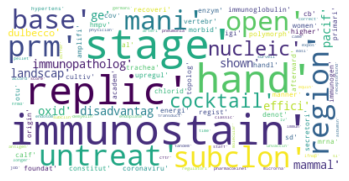

In [332]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(y9))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [320]:
print(df_new21.y[query3])

2562    20
666     20
4749    13
3873    13
714      2
3509    20
6261    20
9151    14
1902     5
844     20
Name: y, dtype: int32


In [262]:
print(df_new.paper_id[query3] , df_new.body_text[query3],df_new.y[query3])

2562    PMC6148620
666     PMC7079521
4749    PMC5129628
3873    PMC5705692
714     PMC7110262
3509    PMC5661195
6261    PMC3864162
9151    PMC1481583
1902    PMC6749104
844     PMC7124078
Name: paper_id, dtype: object 2562    Members of the MLA InSight Initiative Task For...
666     The coronavirus belongs to a family of viruses...
4749    Cases of Middle East respiratory syndrome (MER...
3873    There is currently a lack of consensus around ...
714     In December 2019, a newly identified coronavir...
3509    This literature review was conducted in four p...
6261    There are two general surveillance systems for...
9151    Chronic obstructive pulmonary disease (COPD) i...
1902    Influenza A (H1N1) prophylaxis with neuraminid...
844     As we saw in Chapter 10.1007/978-3-319-64337-3...
Name: body_text, dtype: object 2562     9
666      9
4749    18
3873     1
714     18
3509     9
6261     9
9151    18
1902    16
844      9
Name: y, dtype: int32


In [257]:
query4= search(q4,10)
print(df_new.y[query4])

5993    16
6121     2
3385    10
8840    10
973     14
1884     6
1947     3
3430     1
1598    14
595      0
Name: y, dtype: int32


In [435]:
#print(query4, keywords)
print('Key words (k=14)', y14[:30]) #20%
print('Key words (k=10)', y10[:30]) #20%
print('Key words (k=1)', y1[:30])#10%
print('Key words (k=16)', y16[:30])#10%
print('Key words (k=2)', y2[:30])#10%
print('Key words (k=3)', y3[:30])#10%
print('Key words (k=6)', y6[:30])#10%
print('Key words (k=0)', y0[:30])#10%

Key words (k=14) ['certainli', 'stochast', 'inoculum', 'usepackag', 'viruslik', 'genu', 'choic', 'repres', 'factor', 'declin', 'fine', 'visit', 'di', 'ili', 'wound', 'vacv', 'pseudomona', 'virul', 'titr', 'strictli', 'moi', 'southern', 'tertiari', 'card', 'epidem', 'lipid', 'acut', 'download', 'identifi', 'everi']
Key words (k=10) ['gastroenter', 'door', 'scientist', 'priorit', 'extens', 'fourth', 'race', 'mitochondri', 'exactli', 'contagi', 'scenario', 'graphic', 'hrsv', 'solid', 'ib', 'usepackag', 'read', 'sfv', 'coincid', 'mass', 'stakehold', 'gene', 'stochast', 'interestingli', 'perman', 'gel', 'altern', 'row', 'noninvas', 'choic']
Key words (k=1) ['portion', 'binomi', 'quantiti', 'maxim', 'urin', 'viabil', 'opposit', 'hybrid', 'stem', 'longitudin', 'infus', 'chines', 'appli', 'review', 'video', 'agricultur', 'hrsv', 'length', 'recycl', 'al', 'disord', 'streptococcu', 'cassett', 'climat', 'transmiss', 'caus', 'seropreval', 'diagnos', 'upr', 'arteri']
Key words (k=16) ['airborn', 'e

In [258]:
print(df_new.paper_id[query4] ,df_new.body_text[query4],  df_new.y[query4])

5993    PMC4811365
6121    PMC3840482
3385    PMC5680193
8840    PMC2973933
973     PMC7092746
1884    PMC6668849
1947    PMC6723221
3430    PMC5648414
1598    PMC6572542
595     PMC7054935
Name: paper_id, dtype: object 5993    DNA technology has advanced, so that it is now...
6121    To start its business, a virus generally has t...
3385    We are all acquainted with viruses. Often as a...
8840    Organismal complexity is difficult to define a...
973     This chapter, authored by David Wentworth and ...
1884    Live vaccines replicate within the host. As tr...
1947    The animal kingdom, including humans, has evol...
3430    A pathogen is defined as an organism causing d...
1598    The search for an effective human immunodefici...
595     The emergence and outbreak of a newly discover...
Name: body_text, dtype: object 5993    16
6121     2
3385    10
8840    10
973     14
1884     6
1947     3
3430     1
1598    14
595      0
Name: y, dtype: int32


In [259]:
query5= search(q5,10)
print(df_new.y[query5])

467     18
859     18
813     19
860      6
3208    18
788     18
919      1
799     18
3863     1
4532     1
Name: y, dtype: int32


In [436]:
#print(query5, keywords)
print('Key words (k=18)', y18[:30]) #50%
print('Key words (k=1)', y1[:30])#30%
print('Key words (k=6)', y6[:30])#10%
print('Key words (k=19)', y19[:30])#10%

Key words (k=18) ['percentag', 'chain', 'vaccinia', 'strongli', 'permeabil', 'transplant', 'defens', 'occur', 'tbst', 'tertiari', 'annual', 'bilater', 'headach', 'disabl', 'clearanc', 'cytotox', 'ttest', 'rev', 'inflammatori', 'trend', 'san', 'genet', 'provinci', 'serumfre', 'facemask', 'disord', 'sexual', 'communic', 'vehicl', 'geograph']
Key words (k=1) ['portion', 'binomi', 'quantiti', 'maxim', 'urin', 'viabil', 'opposit', 'hybrid', 'stem', 'longitudin', 'infus', 'chines', 'appli', 'review', 'video', 'agricultur', 'hrsv', 'length', 'recycl', 'al', 'disord', 'streptococcu', 'cassett', 'climat', 'transmiss', 'caus', 'seropreval', 'diagnos', 'upr', 'arteri']
Key words (k=6) ['upper', 'decreas', 'deposit', 'unrel', 'transgen', 'ili', 'helic', 'circul', 'hpi', 'nasopharyng', 'stretch', 'vh', 'properti', 'worldwid', 'carcinoma', 'identif', 'dpi', 'paper', 'tbev', 'muscl', 'gamma', 'anim', 'csfv', 'kindli', 'exist', 'differenti', 'ifnar', 'sampl', 'resin', 'confluent']
Key words (k=19) ['t

In [260]:
print(df_new.paper_id[query5] , df_new.body_text[query5] ,df_new.y[query5])

467     PMC7083240
859     PMC7138423
813     PMC7110291
860     PMC7148425
3208    PMC5439730
788     PMC7125419
919     PMC7098034
799     PMC7123290
3863    PMC5760517
4532    PMC5065138
Name: paper_id, dtype: object 467     COVID-19 is a coronavirus outbreak that initia...
859     History of the outbreak\nOn 31st December 2019...
813     China is a member state of the WHO Western Pac...
860     There is no pre-existing immunity to a virus n...
3208    Aerosols are defined as liquid or solid partic...
788     We included any original study included conduc...
919     Coronavirus disease 2019 (abbreviated “COVID-1...
799     The novel coronavirus disease 2019 (COVID-19),...
3863    Respiratory failure is a serious complication ...
4532    There has been concern about work related dise...
Name: body_text, dtype: object 467     18
859     18
813     19
860      6
3208    18
788     18
919      1
799     18
3863     1
4532     1
Name: y, dtype: int32


In [34]:
import webbrowser
def paperurl(index):
  url='https://www.ncbi.nlm.nih.gov/pmc/articles/'
  url_list=[]
  for i in index:
    paperid=df.paper_id[i]
    lst= url+paperid
    url_list.append(lst)  
    webbrowser.open_new(lst)
  return url_list

In [323]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [324]:
txt=[]
for i in q1:
  txt.append(df_new.BoW[i])

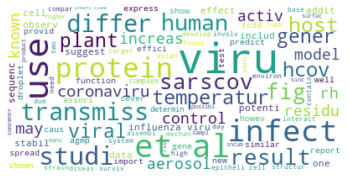

In [325]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(txt))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() #query='What is known about transmission, incubation, and environmental stability?'

In [326]:
txt2=[]
for i in query2:
  txt2.append(df_new.BoW[i])

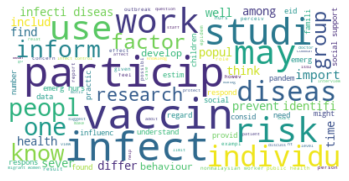

In [327]:
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(txt2))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [328]:
def wordcloud_q(query_result):
  txt=[]
  for i in query_result:
    txt.append(df_new.BoW[i])
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(txt))
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

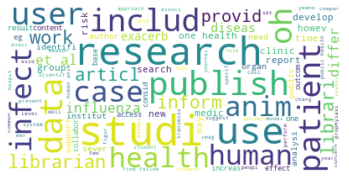

In [329]:
wordcloud_q(query3)#q3='What has been published about medical care?'

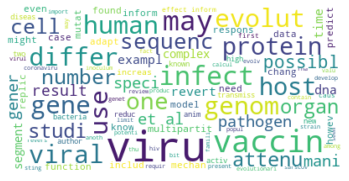

In [330]:
wordcloud_q(query4)#q4='What do we know about virus genetics, origin, and evolution?'

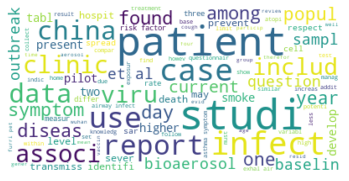

In [331]:
wordcloud_q(query5)#q5='Does smoking increase the risk of COVID?'

In [ ]:
#tfid.shape

In [ ]:
#term = vectorizer.get_feature_names()

In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(analyzer='word',stop_words='english', max_features=4500)
tfid_matrix=vectorizer2.fit_transform(df.bow)'''

In [ ]:
#tfid_matrix.shape

In [0]:
#terms = vectorizer2.get_feature_names()

In [0]:
'''from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
tfid_matrix_reduced= pca.fit_transform(tfid_matrix.toarray())
tfid_matrix_reduced.shape'''

In [0]:
'''vectorizer3 = TfidfVectorizer(analyzer='word',stop_words='english', max_features=4500)
tfid_matrix2=vectorizer3.fit_transform(df['bow'])'''

In [0]:
'''
terms2 = vectorizer3.get_feature_names()
tfid_matrix2.shape
'''

In [69]:
'''
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfid_matrix_reduced)
clusters = km.labels_.tolist()
'''

'from sklearn.cluster import KMeans\n\nnum_clusters = 5\n\nkm = KMeans(n_clusters=num_clusters)\n\n%time km.fit(tfid_matrix_reduced)\n\nclusters = km.labels_.tolist()'

In [0]:
'''
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfid_matrix2)
clusters = km.labels_.tolist()
'''

In [0]:
#bow_vect = CountVectorizer(analyzer='word',stop_words='english', max_features=4500)
#bow_matrix = bow_vect.fit_transform(df['bow'])

In [0]:
#bow_df = pd.DataFrame(bow_matrix, columns = bow_vect.get_feature_names())
#bow_df.to_pickle("bowfreq.pkl")

In [0]:
'''
from gensim.corpora import Dictionary
wordcnt = {} 
for d in df.bow: 
    words = nltk.word_tokenize(d) 
    for w in words: 
        if w not in wordcnt.keys(): 
            wordcnt[w] = 1
        else: 
            wordcnt[w] += 1
'''

In [0]:
#dictionary = Dictionary(corpus)

In [0]:
#index_min = np.argmin(doc_scores)
#print(index_min)
##Returns the indices of the maximum values
#index_max=np.argmax(doc_scores)
#print(index_max)

In [0]:
#url='https://www.ncbi.nlm.nih.gov/pmc/articles/'

In [0]:
 #webbrowser.open(url.join(df.paper_id[i]), new=2)

In [0]:
#vectorizer = TfidfVectorizer(stop_words='english')
#tfid=vectorizer.fit_transform(df.bow)

In [0]:
#stage 2 document clustering
'''
#choose k for kmean with Elbow method 
sse = []
list_k = list(range(1, 10))
for k in list_k:
    Kmean = KMeans(n_clusters=k)
    Kmean.fit(tfid_matrix_reduced)
    sse.append(Kmean.inertia_)'''

In [0]:
# Plot sse against k
'''
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')'''

In [0]:
'''
#2.Agglomerative
from sklearn.cluster import AgglomerativeClustering
Agglo = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model=Agglo.fit(tfid_matrix_reduced)
labels = model.labels_
'''

In [0]:
'''
#visulization for Agglomerative
plt.scatter(tfid_matrix_reduced[labels==1, 0], tfid_matrix_reduced[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(tfid_matrix_reduced[labels==2, 0], tfid_matrix_reduced[labels==2, 1], s=50, marker='o', color='blue')
plt.scatter(tfid_matrix_reduced[labels==3, 0], tfid_matrix_reduced[labels==3, 1], s=50, marker='o', color='green')
plt.scatter(tfid_matrix_reduced[labels==4, 0], tfid_matrix_reduced[labels==4, 1], s=50, marker='o', color='purple')
plt.scatter(tfid_matrix_reduced[labels==5, 0], tfid_matrix_reduced[labels==5, 1], s=50, marker='o', color='orange')
plt.show()
'''

In [0]:
'''from sklearn.manifold import TSNE
tsne=TSNE(verbose=1, perplexity=100, random_state=42)
x_embed=tsne.fit_transform(tfid_matrix_reduced)'''

In [0]:
'''#2.Agglomerative
from sklearn.cluster import AgglomerativeClustering
Agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model2=Agglo.fit(tfid_matrix_reduced)
labels2 = model2.labels_'''

In [0]:
#stage 2 document clustering
'''
#visulization for Agglomerative
plt.scatter(tfid_matrix_reduced[labels2==1, 0], tfid_matrix_reduced[labels2==1, 1], s=50, marker='o', color='red')
plt.scatter(tfid_matrix_reduced[labels2==2, 0], tfid_matrix_reduced[labels2==2, 1], s=50, marker='o', color='blue')
plt.scatter(tfid_matrix_reduced[labels2==3, 0], tfid_matrix_reduced[labels2==3, 1], s=50, marker='o', color='green')
plt.show()
'''

In [0]:
#stage 2 document clustering
'''from sklearn.cluster import KMeans
s_dist = []
Kmeans = range(1,11)
for k in Kmeans:
    km = KMeans(n_clusters=k)
    km = km.fit(tfid_matrix2)
    s_dist.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(Kmeans, s_dist, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')'''

In [0]:
#stage2-LDA: Topic Modeling
#from sklearn.decomposition import LatentDirichletAllocation

In [0]:
'''
number_topics=20
LDA = LatentDirichletAllocation(n_components = number_of_topics, max_iter = 10, 
                                learning_offset = 50.,random_state = 0,
                                learning_method = 'online')
LDA.fit(bow_matrix)
t_features = bow_vect.get_feature_names()
for t_id, topic in enumerate(LDA.components_):
    print ("Topic %d:" % (t_id))
    print (" ".join([t_features[i] for i in topic.argsort()[:-number_topics - 1:-1]]))
'''

Topic 0:
infect respiratori detect viral sampl rsv virus viru studi cat pathogen ibv children coinfect clinic use posit pcr type differ
Topic 1:
cell infect use fig express figur viru incub protein antibodi cultur result pb control wash assay viral min transfect observ
Topic 2:
health diseas public countri research inform use develop studi report particip respons includ outbreak risk commun emerg surveil provid data
Topic 3:
protein viral activ cell rna interact bind replic viru membran domain infect structur inhibit function complex host mutant express virus
Topic 4:
et al studi infect cell grft viral wang plant protein li report effect author develop human recent chen research figur
Topic 5:
merscov anim studi sampl dog infect farm camel use calv herd report age diseas test differ mer day case cattl
Topic 6:
influenza viru virus infect ha chicken vaccin pandem iav avian strain human bird viral season poultri subtyp na ferret differ
Topic 7:
usepackag model case infect estim transmiss number time epidem contact individu outbreak popul rate data diseas document use distribut effect
Topic 8:
sequenc genom use gene region rna protein strain nucleotid acid read site amino virus fig posit analysi structur viral codon
Topic 9:
cell infect mice respons immun activ express viral cytokin ifn type macrophag induc viru increas diseas signal level product role
Topic 10:
use sampl detect assay pcr test primer dna rna reaction specif perform method min result μl posit probe sensit control
Topic 11:
activ compound effect use concentr drug inhibit acid peptid antivir bind inhibitor mm hz extract structur residu ph μm nm
Topic 12:
patient studi case hospit infect use age clinic sever year respiratori children group test associ report includ symptom day pneumonia
Topic 13:
use data model method differ predict result valu set number figur structur base analysi approach perform studi time inform process
Topic 14:
human viru bat infect speci host pathogen diseas virus anim transmiss viral studi includ caus dengu popul potenti identifi case
Topic 15:
strain pig pedv group viru infect anim studi day piglet prrsv inocul vaccin use dpi porcin intestin tgev isol challeng
Topic 16:
mutat genotyp variant genet popul studi gene strain differ allel associ snp use select chikv env infect human resist ifitm
Topic 17:
gene express protein transcript use pathway mrna analysi regul identifi cell level rna function studi respons signal differenti upregul target
Topic 18:
vaccin immun antibodi cell respons protein antigen use peptid epitop mice neutral protect develop human target bind mab express vector
Topic 19:
lung group level increas studi effect treatment mice tissu blood diseas use anim day significantli control signific liver result decreas

In [0]:
'''#reprocessing
new_dict['bow'] = " "
for index,row in new_dict.iterrows():
    description = row['body_text']
    # split into words
    tokens = word_tokenize(description,language="english")
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # stemming of words - reducing each word to its root or base.
    porter = PorterStemmer()
    word = [porter.stem(word) for word in words]
    new_dict.at[index,'bow'] = word
new_dict['bow'] = [' '.join(map(str, l)) for l in new_dict['bow']]
new_dict.tail()
'''

In [0]:
'''
from nltk.stem import *
tokens = word_tokenize(query,language="english")
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
# stemming of words - reducing each word to its root or base.
porter = PorterStemmer()
word = [porter.stem(word) for word in words]
'''

In [0]:
#stage1
'''import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import glob
import json
all_jsonpmc = glob.glob(f'{root_path}/comm_use_subset/comm_use_subset/pmc_json/*.xml.json', recursive=True)
'''

In [0]:
#stage1- read json file
'''
class FileReader2:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.title=content['metadata']['title']
            self.body_text = []
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])

            self.body_text = '\n'.join(self.body_text)
            #
    def __repr__(self):
        return f'{self.paper_id}: {self.title[:200]}... {self.body_text[:200]}...'
'''

In [0]:
#stage1-save json files (Paper's body texts to pickle)
'''
dict2_ = {'paper_id': [], 'title':[], 'body_text': []}
for idx, entry in enumerate(all_jsonpmc):
    if idx % (len(all_jsonpmc) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_jsonpmc)}')
    pmccontent = FileReader2(entry)
    dict2_['paper_id'].append(pmccontent.paper_id)
    dict2_['title'].append(pmccontent.title)
    dict2_['body_text'].append(pmccontent.body_text)
df_covidpmc = pd.DataFrame(dict2_, columns=['paper_id','title', 'body_text'])
df_covidpmc.head()
df_covidpmc.to_pickle("covidpmc.pkl")'''

In [0]:
#Data Visualizaiton
'''
data = pd.read_csv("https://open-covid-19.github.io/data/data.csv")
usdata=data.loc[data['Key']=='US']
us_data=usdata.drop(columns=['Key','RegionCode','RegionName','CountryName','CountryCode','Latitude','Longitude'	])
us_data=us_data[us_data.Confirmed != 0]
us_data2=us_data[us_data.Confirmed >= 0] # first comfirmed case in the US is 2020-01-20
us_data2[us_data2.Deaths!=0] # first death case 2020-02-29
us_data2['new_comfirmedcase']=us_data2.Confirmed.diff()
us_data2['New_deathscase']=us_data2.Deaths.diff()
us_data2['new_comfirmedcase']=us_data2['new_comfirmedcase'].fillna(1)
us_data2['New_deathscase']=us_data2['New_deathscase'].fillna(0)
'''

In [0]:
'''
ts = us_data2.set_index('Date')
plt.xlabel("Date")
plt.ylabel("Number of New Comfirmed case")
plt.plot(ts.new_comfirmedcase)
'''

In [0]:
'''
plt.xlabel("Date")
plt.ylabel("Number of Total Comfirmed case")
plt.plot(ts.Confirmed)
'''

In [0]:
'''
plt.xlabel("Date")
plt.ylabel("Number of Total Deaths case")
plt.plot(ts.Deaths)
'''

In [0]:
'''
plt.xlabel("Date")
plt.ylabel("Number of New deaths case")
plt.plot(ts.New_deathscase)
'''

In [0]:
'''
plt.xlabel("Date")
plt.ylabel("Number of New Comfirmed case vs New deaths case")
plt.plot(ts.new_comfirmedcase)
plt.plot(ts.New_deathscase)
'''

In [0]:
'''
plt.xlabel("Date")
plt.ylabel("Number of Total Comfirmed case vs Death")
plt.plot(ts.Confirmed)
plt.plot(ts.Deaths)
'''